In [19]:
import numpy as np
import pandas as pd
import seaborn as sns

# importing Data

In [144]:
# df = pd.read_csv(r"/Users/shahriyarsharbatdar/Desktop/jupyter notebook/example/titanic/Titanic/train.csv")
# or
df = sns.load_dataset("titanic")

In [145]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Check Data Types 

In [146]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [147]:
df.astype({'sex': 'category'})

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [148]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

### check unique value for each column

In [149]:
{col: df[col].nunique() for col in df}

{'survived': 2,
 'pclass': 3,
 'sex': 2,
 'age': 88,
 'sibsp': 7,
 'parch': 7,
 'fare': 248,
 'embarked': 3,
 'class': 3,
 'who': 3,
 'adult_male': 2,
 'deck': 7,
 'embark_town': 3,
 'alive': 2,
 'alone': 2}

find column object type

In [150]:
{col: df[col].nunique() for col in df if df[col].dtype==object}

{'sex': 2, 'embarked': 3, 'who': 3, 'embark_town': 3, 'alive': 2}

In [161]:
df = df.astype(
    {
        'alive': 'category',
        'sex': 'category',
        'embarked': 'category',
        'who': 'category',
        'embark_town': 'category',
    }
)

In [162]:
df.dtypes

survived          int64
pclass            int64
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
embarked       category
class          category
who            category
adult_male         bool
deck           category
embark_town    category
alive          category
alone              bool
dtype: object

### change to binary

In [163]:
df.sex = df.sex.cat.codes
df.alive = df.alive.cat.codes


In [164]:
df[['alive', 'sex']]

,alive,sex
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,0,0
889,1,1


## check correlation

In [182]:
df.corr(numeric_only=True)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.094035,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.908578,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.280328,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.349943,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.182024,0.257307,-0.271832
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,1.000000,-0.557080,0.404744
alive,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.404744,-0.203367,1.000000


for better sight:

In [198]:
df.corr(numeric_only=True).style.background_gradient(cmap='Greens')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.094035,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.908578,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.280328,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.349943,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.182024,0.257307,-0.271832
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,1.000000,-0.557080,0.404744
alive,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.404744,-0.203367,1.000000


In [196]:
df.corr(numeric_only=True)[['survived']].style.background_gradient(cmap='coolwarm_r')

,survived
survived,1.000000
pclass,-0.338481
sex,-0.543351
age,-0.077221
sibsp,-0.035322
parch,0.081629
fare,0.257307
adult_male,-0.557080
alive,1.000000
alone,-0.203367


As we can observe, the "alive" column is duplicated with the "survived" column with corelation # 1, so we can safely drop it.

In [200]:
df.drop(columns='alive', inplace=True)

In [201]:
df.corr(numeric_only=True)[['survived']].style.background_gradient(cmap='coolwarm_r')

,survived
survived,1.000000
pclass,-0.338481
sex,-0.543351
age,-0.077221
sibsp,-0.035322
parch,0.081629
fare,0.257307
adult_male,-0.557080
alone,-0.203367


In [207]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


percent of people who survived:

In [225]:
df.describe().at['mean','survived'] * 100

38.38383838383838

In [205]:
df.describe(include='category')

,embarked,class,who,deck,embark_town
count,889,891,891,203,889
unique,3,3,3,7,3
top,S,Third,man,C,Southampton
freq,644,491,537,59,644


We don't know if "embarked" and "embarked_town" are the same, so we need to test them.

In [237]:
(df.embark_town.str.get(0) == df.embarked).all()

False

In [238]:
df['embark_char'] = df.embark_town.str.get(0) 

In [239]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone,embark_char
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False,S
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False,C
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True,S
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False,S
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,True,S
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,True,S
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,False,S
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,True,C


In [243]:
df[df['embark_char'] != df['embarked']]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone,embark_char
61,1,1,0,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,True,NaN
829,1,1,0,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,True,NaN


In [247]:
sum((df.embark_town.str.get(0) == df.embarked) / df.shape[0]) * 100

99.77553310886603

In 99.7% of cases, these columns are the same. However, due to null values in some instances, they might appear different in certain rows. Nonetheless, the majority of the time, they contain matching values. Hence, we can confidently drop one of them.

# missing values check

In [248]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
embark_char      2
dtype: int64

<Axes: >

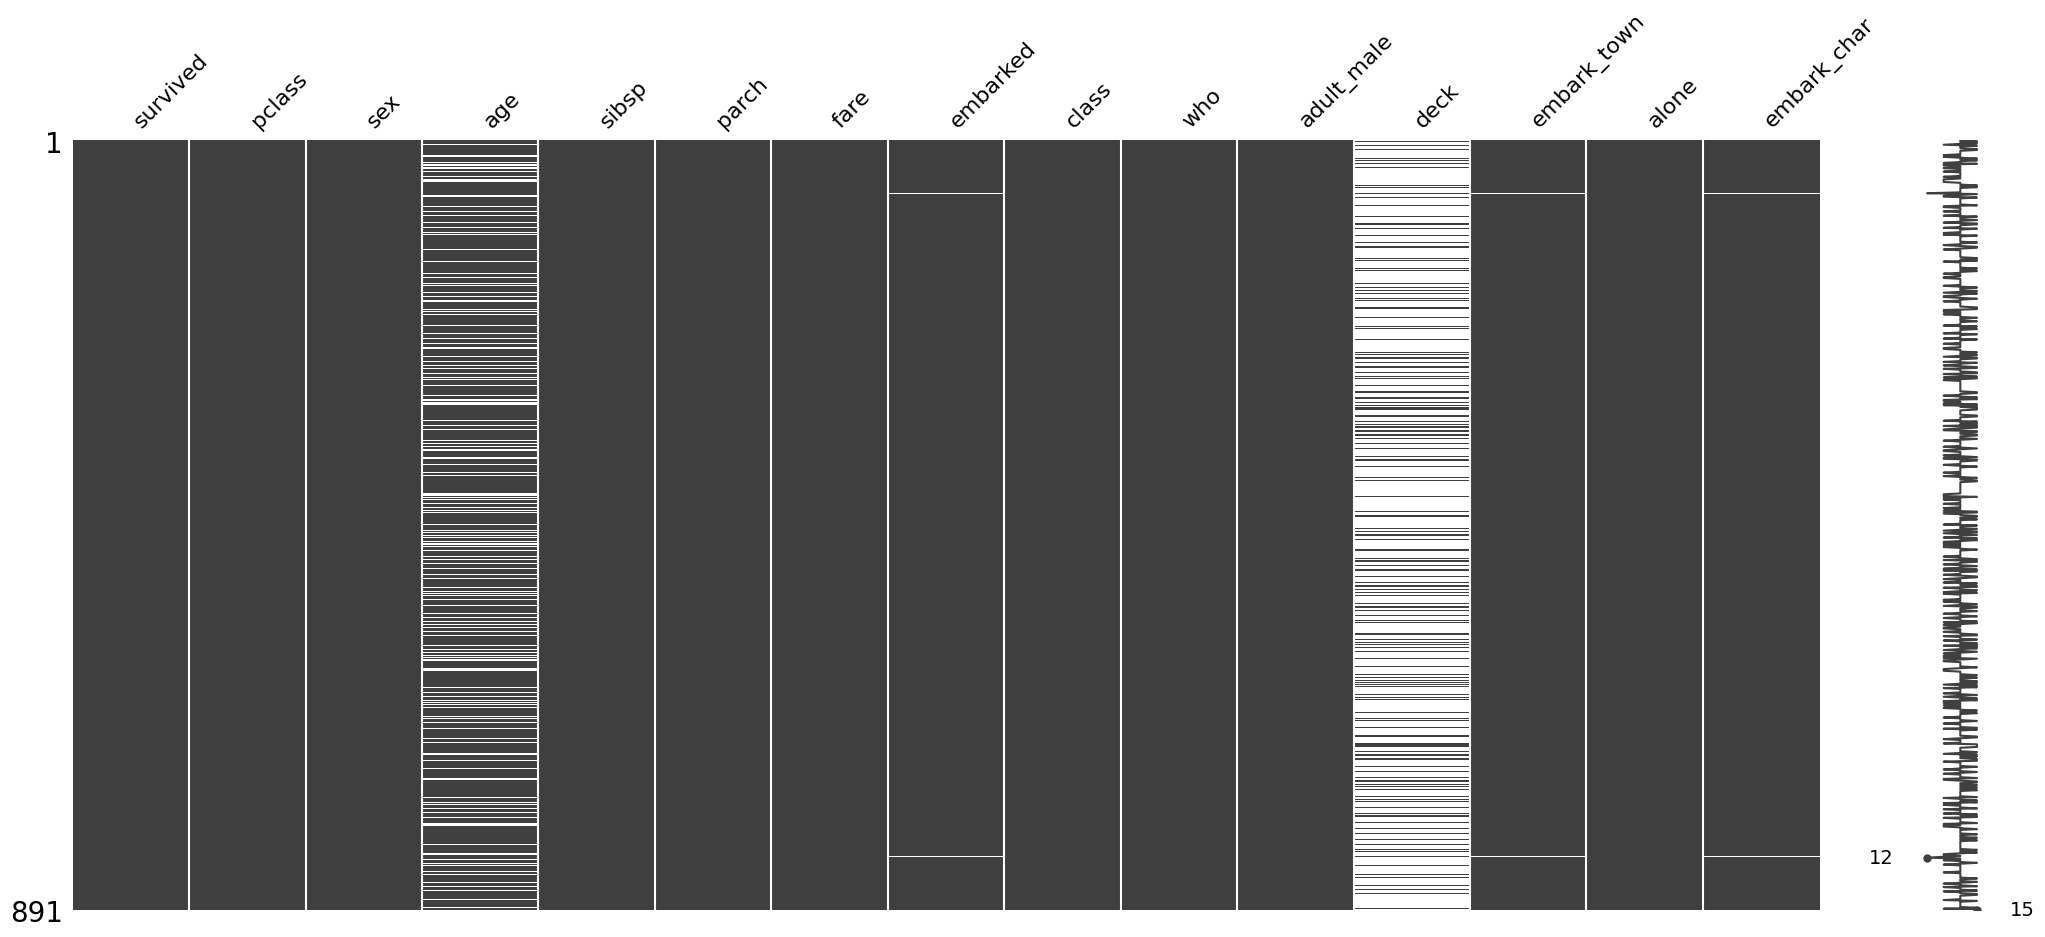

In [250]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

177 null value for 'age' column!

In [256]:
df.drop(['embarked', 'embark_char'], axis=1, inplace=True)

<Axes: >

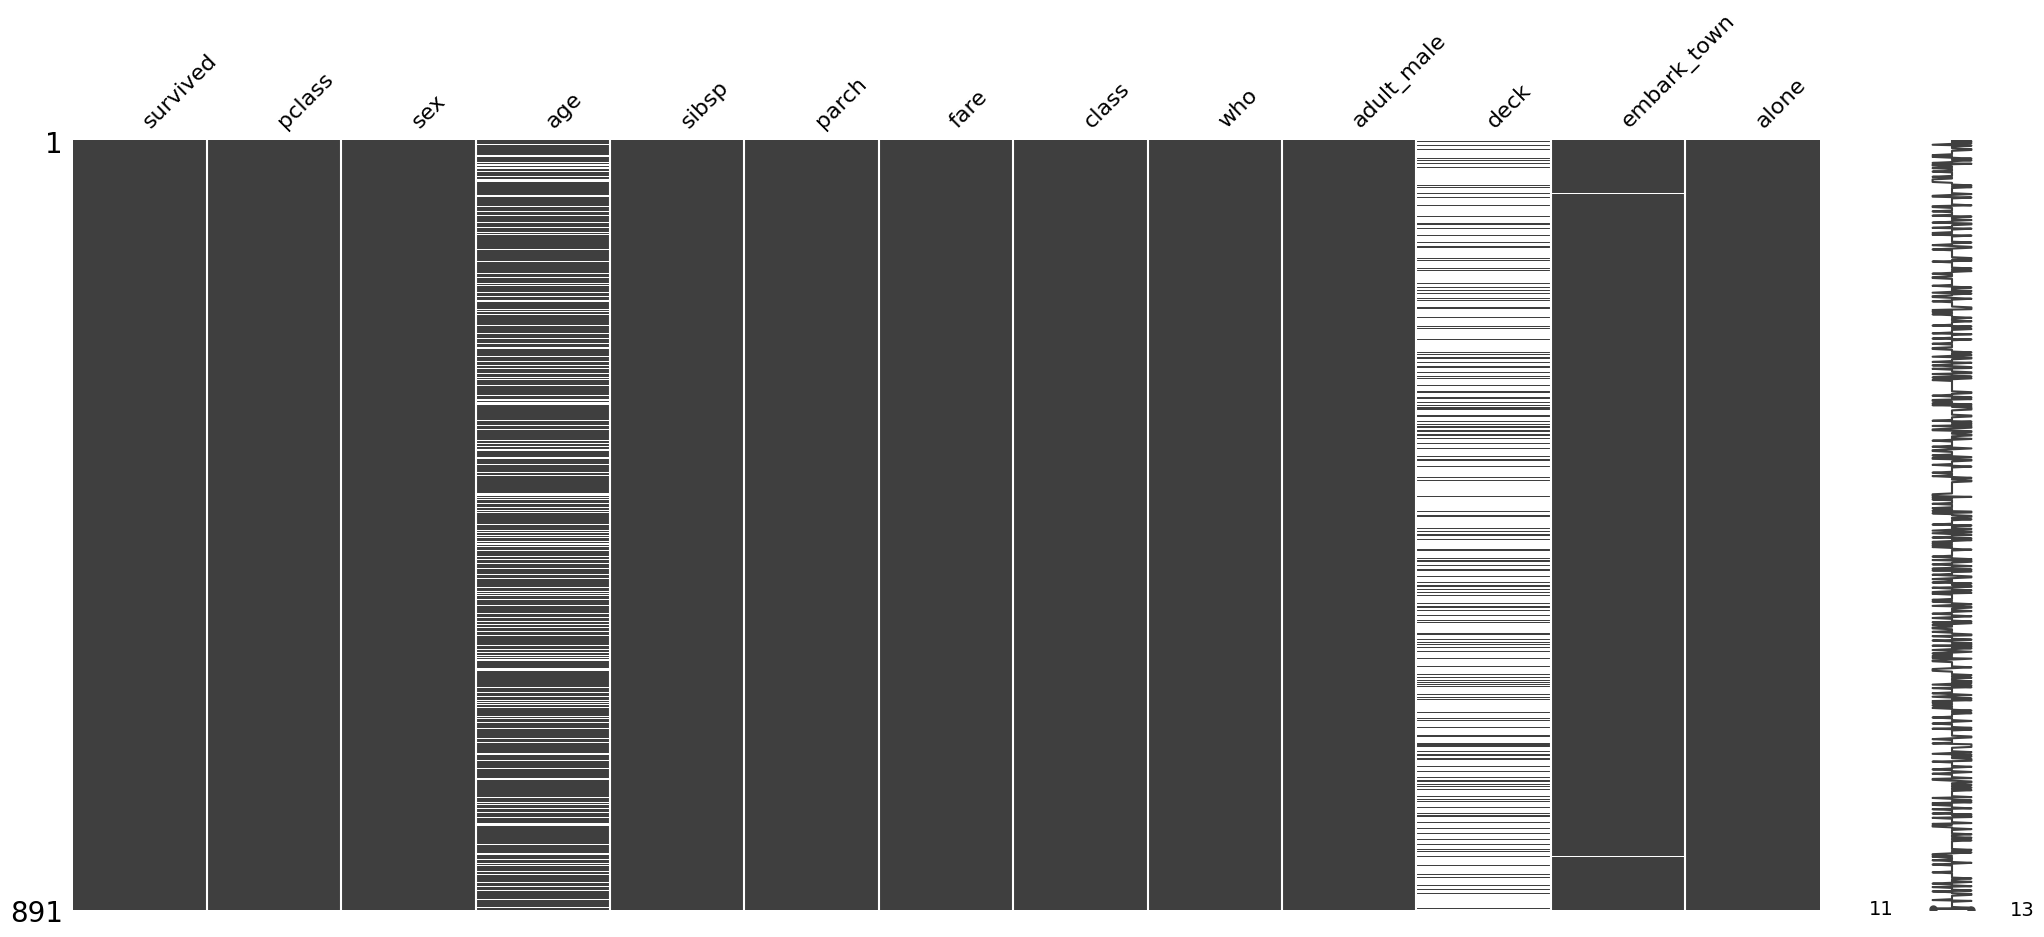

In [257]:
msno.matrix(df)

deck is 80% nan so drop it.

In [258]:
df.drop(columns= 'deck', inplace=True)

# Age

In [267]:
df.corr(numeric_only=True)[['survived']].style.background_gradient(cmap='coolwarm_r')

,survived
survived,1.000000
pclass,-0.338481
sex,-0.543351
age,-0.077221
sibsp,-0.035322
parch,0.081629
fare,0.257307
adult_male,-0.557080
alone,-0.203367


<Axes: xlabel='age', ylabel='Count'>

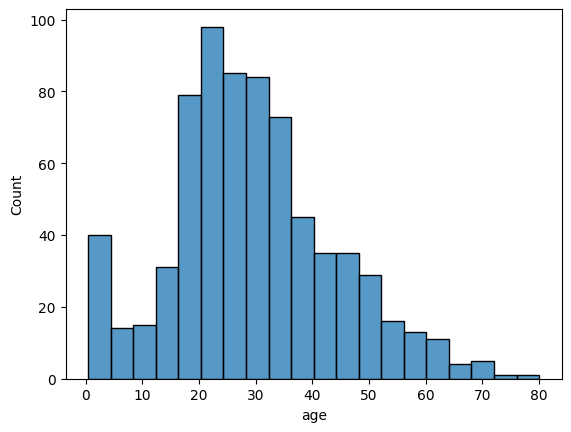

In [269]:
sns.histplot(df.age)

fill null value with mean:

<Axes: xlabel='age', ylabel='Count'>

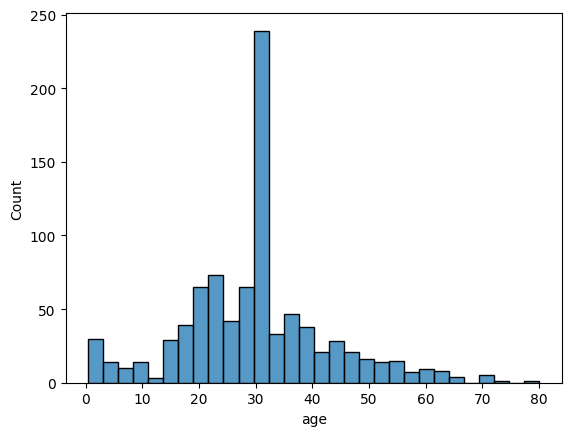

In [273]:
sns.histplot(df.age.fillna(df.age.mean()))

check with last distribute:

<Axes: xlabel='age', ylabel='Count'>

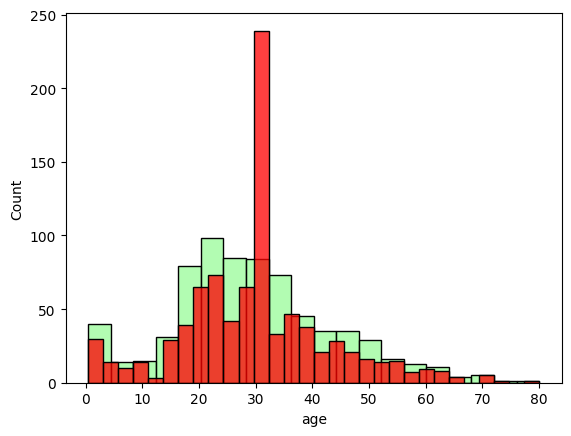

In [276]:
ax = sns.histplot(df.age, color='palegreen')
sns.histplot(df.age.fillna(df.age.mean()), ax=ax, color='r')

bad distribute with fill nulls with age.mean()!

In [285]:
df.corr(numeric_only=True)[['age']].style.background_gradient('coolwarm_r')

,age
survived,-0.077221
pclass,-0.369226
sex,0.093254
age,1.000000
sibsp,-0.308247
parch,-0.189119
fare,0.096067
adult_male,0.280328
alone,0.198270


In [297]:
df.groupby(['adult_male']).age.mean()

adult_male
False    24.932458
True     33.173123
Name: age, dtype: float64

In [298]:
df['age_2'] = df['age'].fillna(df.groupby(['adult_male', 'sex', 'sibsp', 'alone'])['age'].transform('mean'))

now seems better distribute!

<Axes: xlabel='age', ylabel='Count'>

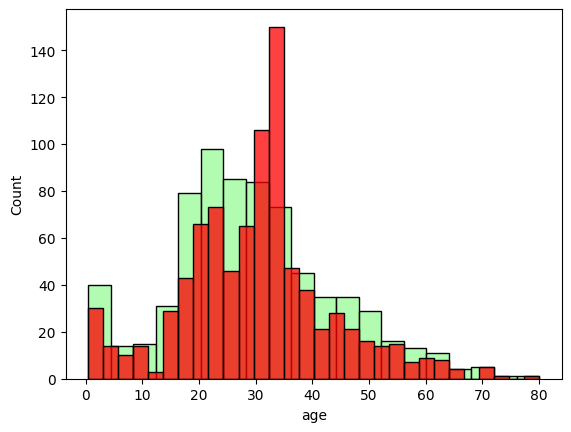

In [300]:
ax = sns.histplot(df.age, color='palegreen')
sns.histplot(df.age.fillna(df.age_2), ax=ax, color='r')

seems better distribute!

In [301]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone,age_2
0,0,3,1,22.0,1,0,7.2500,Third,man,True,Southampton,False,22.000000
1,1,1,0,38.0,1,0,71.2833,First,woman,False,Cherbourg,False,38.000000
2,1,3,0,26.0,0,0,7.9250,Third,woman,False,Southampton,True,26.000000
3,1,1,0,35.0,1,0,53.1000,First,woman,False,Southampton,False,35.000000
4,0,3,1,35.0,0,0,8.0500,Third,man,True,Southampton,True,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,Second,man,True,Southampton,True,27.000000
887,1,1,0,19.0,0,0,30.0000,First,woman,False,Southampton,True,19.000000
888,0,3,0,NaN,1,2,23.4500,Third,woman,False,Southampton,False,30.738889
889,1,1,1,26.0,0,0,30.0000,First,man,True,Cherbourg,True,26.000000


In [302]:
df.corr(numeric_only=True)[['survived']].style.background_gradient('coolwarm_r')

,survived
survived,1.000000
pclass,-0.338481
sex,-0.543351
age,-0.077221
sibsp,-0.035322
parch,0.081629
fare,0.257307
adult_male,-0.557080
alone,-0.203367
age_2,-0.083549
